<a href="https://colab.research.google.com/github/Matus-Dubrava/ml_colab/blob/master/linear_autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
plt.style.use("seaborn")

In [0]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

In [0]:
X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

Using PCA to reduce dimensions from 3 to 2.

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_transformed = pca.fit_transform(X_train)
X_transformed.shape

(60, 2)

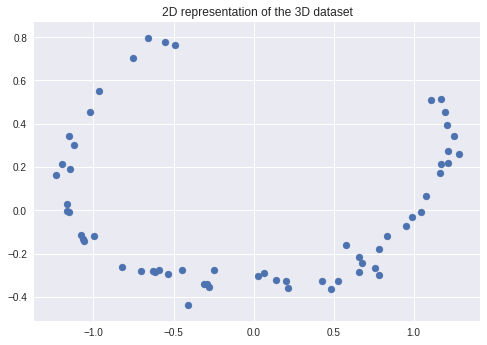

In [28]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])
plt.title("2D representation of the 3D dataset")
plt.show()

Using linear autoencoder to perform PCA

In [0]:
encoder = keras.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.Sequential([encoder, decoder])
autoencoder.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1.5))

In [31]:
autoencoder.fit(X_train, X_train, epochs=20)

Train on 60 samples
Epoch 1/20
60/60 [==============================] - 0s 4ms/sample - loss: 0.7278
Epoch 2/20
60/60 [==============================] - 0s 125us/sample - loss: 0.1726
Epoch 3/20
60/60 [==============================] - 0s 99us/sample - loss: 0.1306
Epoch 4/20
60/60 [==============================] - 0s 112us/sample - loss: 0.2774
Epoch 5/20
60/60 [==============================] - 0s 120us/sample - loss: 0.1688
Epoch 6/20
60/60 [==============================] - 0s 113us/sample - loss: 0.0559
Epoch 7/20
60/60 [==============================] - 0s 123us/sample - loss: 0.0478
Epoch 8/20
60/60 [==============================] - 0s 116us/sample - loss: 0.0514
Epoch 9/20
60/60 [==============================] - 0s 119us/sample - loss: 0.0460
Epoch 10/20
60/60 [==============================] - 0s 118us/sample - loss: 0.0434
Epoch 11/20
60/60 [==============================] - 0s 113us/sample - loss: 0.0378
Epoch 12/20
60/60 [==============================] - 0s 111us/sample

In [0]:
codings = encoder.predict(X_train)

In [33]:
codings.shape

(60, 2)

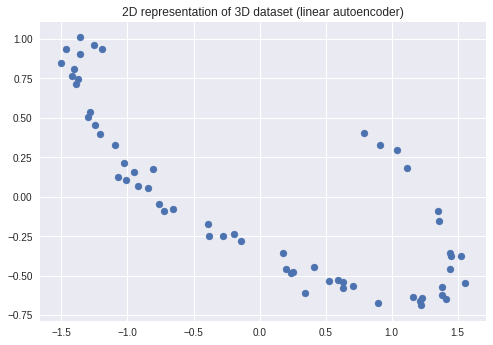

In [34]:
plt.scatter(codings[:, 0], codings[:, 1])
plt.title("2D representation of 3D dataset (linear autoencoder)")
plt.show()